# Exploring relationships

## Table of contents

### [1. Libraries and Data importations](#1)
### [2. Relations/correlations](#2)
-[ Heatmap](#2.1)

-[ Scatterplots](#2.2)

-[ Pair Plots](#2.3)

-[Categorical plots](#2.4)

### [3. Questions / answers](#3)

### [4. Hypothesis defining from the relation study](#4)

## 1. Libraries and Data importations
<div id='1'></div>

In [5]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns


 

##to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Creating paths to the data folder of the project and to the folder for saving the charts
path_data = r'C:\Users\dacol\Documents\Data Project - careerfoundry\Europe health-deaths analysis\02 Data'
path_viz = r'C:\Users\dacol\Documents\Data Project - careerfoundry\Europe health-deaths analysis\04 Analysis\Visualizations'

# Importing the latest merged dataframe
df = pd.read_pickle(os.path.join(path_data,'Prepared Data','cod_merged_full.pkl'))


## 2. Relations/Correlations
<div id='2'></div>

### Correlation heatmap
<div id='2.1'></div>

In [8]:
# separating Numerical and categorical variables for easy analysis
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

In [9]:
df[num_cols].corr()

A-R_V-Y: All causes of death (A00-Y89) excluding S00-T98  \
A-R_V-Y: All causes of death (A00-Y89) excludin...                                           1.000000          
A15-A19_B90: Tuberculosis                                                                    0.514720          
ACC: Accidents (V01-X59, Y85, Y86)                                                           0.824003          
ACC_OTH: Other accidents (W20-W64, W75-X39, X50...                                           0.629565          
A_B: Certain infectious and parasitic diseases ...                                           0.758582          
...                                                                                               ...          
Too expensive                                                                                0.215389          
Too expensive or too far to travel or waiting list                                           0.212090          
Too far to travel                                                                            0.334595          
Waiting list                                                                                -0.023694          
Wanted to wait and see if problem got better on...                                           0.143512          

                                                    A15-A19_B90: Tuberculosis  \
A-R_V-Y: All causes of death (A00-Y89) excludin...                   0.514720   
A15-A19_B90: Tuberculosis                                            1.000000   
ACC: Accidents (V01-X59, Y85, Y86)                                   0.424745   
ACC_OTH: Other accidents (W20-W64, W75-X39, X50...                   0.309199   
A_B: Certain infectious and parasitic diseases ...                   0.346408   
...                                                                       ...   
Too expensive                                                        0.491816   
Too expensive or too far to travel or waiting list                   0.477938   
Too far to travel                                                    0.403137   
Waiting list                                                         0.008518   
Wanted to wait and see if problem got better on...                  -0.008327   

                                                    ACC: Accidents (V01-X59, Y85, Y86)  \
A-R_V-Y: All causes of death (A00-Y89) excludin...                            0.824003   
A15-A19_B90: Tuberculosis                                                     0.424745   
ACC: Accidents (V01-X59, Y85, Y86)                                            1.000000   
ACC_OTH: Other accidents (W20-W64, W75-X39, X50...                            0.821747   
A_B: Certain infectious and parasitic diseases ...                            0.711233   
...                                                                                ...   
Too expensive                                                                -0.091433   
Too expensive or too far to travel or waiting list                            0.028337   
Too far to travel                                                             0.136367   
Waiting list                                                                  0.232285   
Wanted to wait and see if problem got better on...                           -0.011922   

                                                    ACC_OTH: Other accidents (W20-W64, W75-X39, X50-X59, Y86)  \
A-R_V-Y: All causes of death (A00-Y89) excludin...                                           0.629565           
A15-A19_B90: Tuberculosis                                                                    0.309199           
ACC: Accidents (V01-X59, Y85, Y86)                                                           0.821747           
ACC_OTH: Other accidents (W20-W64, W75-X39, X50...                                           1.000000           
A_B: Certain infectious and parasitic diseases ...                                      

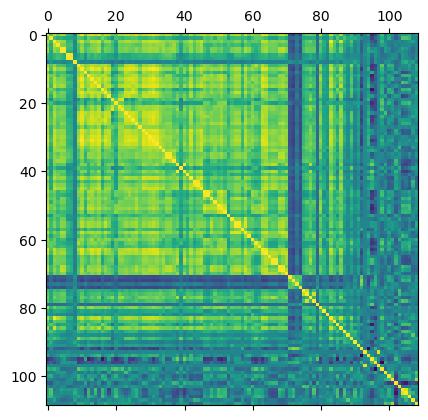

In [10]:
#creating a first draft of the correlation heatmap
plt.matshow(df[num_cols].corr())
plt.show()

This heatmap isn't very helpful because it contains too many variables. Using only the aggregate of all causes of deaths should help understand on a first analysis the link between healthcare resources and deaths.

In [12]:
#creating a subset with the variables with the detailed ressources, and the global deaths
sub = pd.concat([df.loc[:,'A-R_V-Y: All causes of death (A00-Y89) excluding S00-T98'], df.loc[:,'inhabitants_per_physician':'beds_per_100K_inhabitants']], axis=1)

In [13]:
sub.corr()

A-R_V-Y: All causes of death (A00-Y89) excluding S00-T98  \
A-R_V-Y: All causes of death (A00-Y89) excludin...                                           1.000000          
inhabitants_per_physician                                                                   -0.407443          
total_physicians                                                                            -0.002669          
physicians_per_100K_inhabitants                                                              0.255531          
euros_per_inhabitant                                                                        -0.628525          
inhabitants_per_bed                                                                         -0.430250          
total_beds                                                                                   0.018626          
beds_per_100K_inhabitants                                                                    0.441210          

                                                    inhabitants_per_physician  \
A-R_V-Y: All causes of death (A00-Y89) excludin...                  -0.407443   
inhabitants_per_physician                                            1.000000   
total_physicians                                                    -0.106029   
physicians_per_100K_inhabitants                                     -0.846461   
euros_per_inhabitant                                                -0.157971   
inhabitants_per_bed                                                  0.343131   
total_beds                                                          -0.044048   
beds_per_100K_inhabitants                                           -0.242606   

                                                    total_physicians  \
A-R_V-Y: All causes of death (A00-Y89) excludin...         -0.002669   
inhabitants_per_physician                                  -0.106029   
total_physicians                                            1.000000   
physicians_per_100K_inhabitants                             0.093549   
euros_per_inhabitant                                        0.024641   
inhabitants_per_bed                                        -0.030390   
total_beds                                                  0.926254   
beds_per_100K_inhabitants                                   0.029941   

                                                    physicians_per_100K_inhabitants  \
A-R_V-Y: All causes of death (A00-Y89) excludin...                         0.255531   
inhabitants_per_physician                                                 -0.846461   
total_physicians                                                           0.093549   
physicians_per_100K_inhabitants                                            1.000000   
euros_per_inhabitant                                                       0.112280   
inhabitants_per_bed                                                       -0.147277   
total_beds                                                                 0.008166   
beds_per_100K_inhabitants                                                  0.139007   

                                                    euros_per_inhabitant  \
A-R_V-Y: All causes of death (A00-Y89) excludin...             -0.628525   
inhabitants_per_physician                                      -0.157971   
total_physicians                                                0.024641   
physicians_per_100K_inhabitants                                 0.112280   
euros_per_inhabitant                                            1.000000   
inhabitants_per_bed                                             0.414185   
total_beds                                                      0.031258   
beds_per_100K_inhabitants                                      -0.407484   

                                                    inhabitants_per_bed  \
A-R_V-Y: All causes of death (A00-Y89) excludin...            -0.430250   
inhabitants_per_physician                    

In [78]:
sub.corr().to_excel(os.path.join(path_data, 'Prepared Data','correlation.xlsx'))

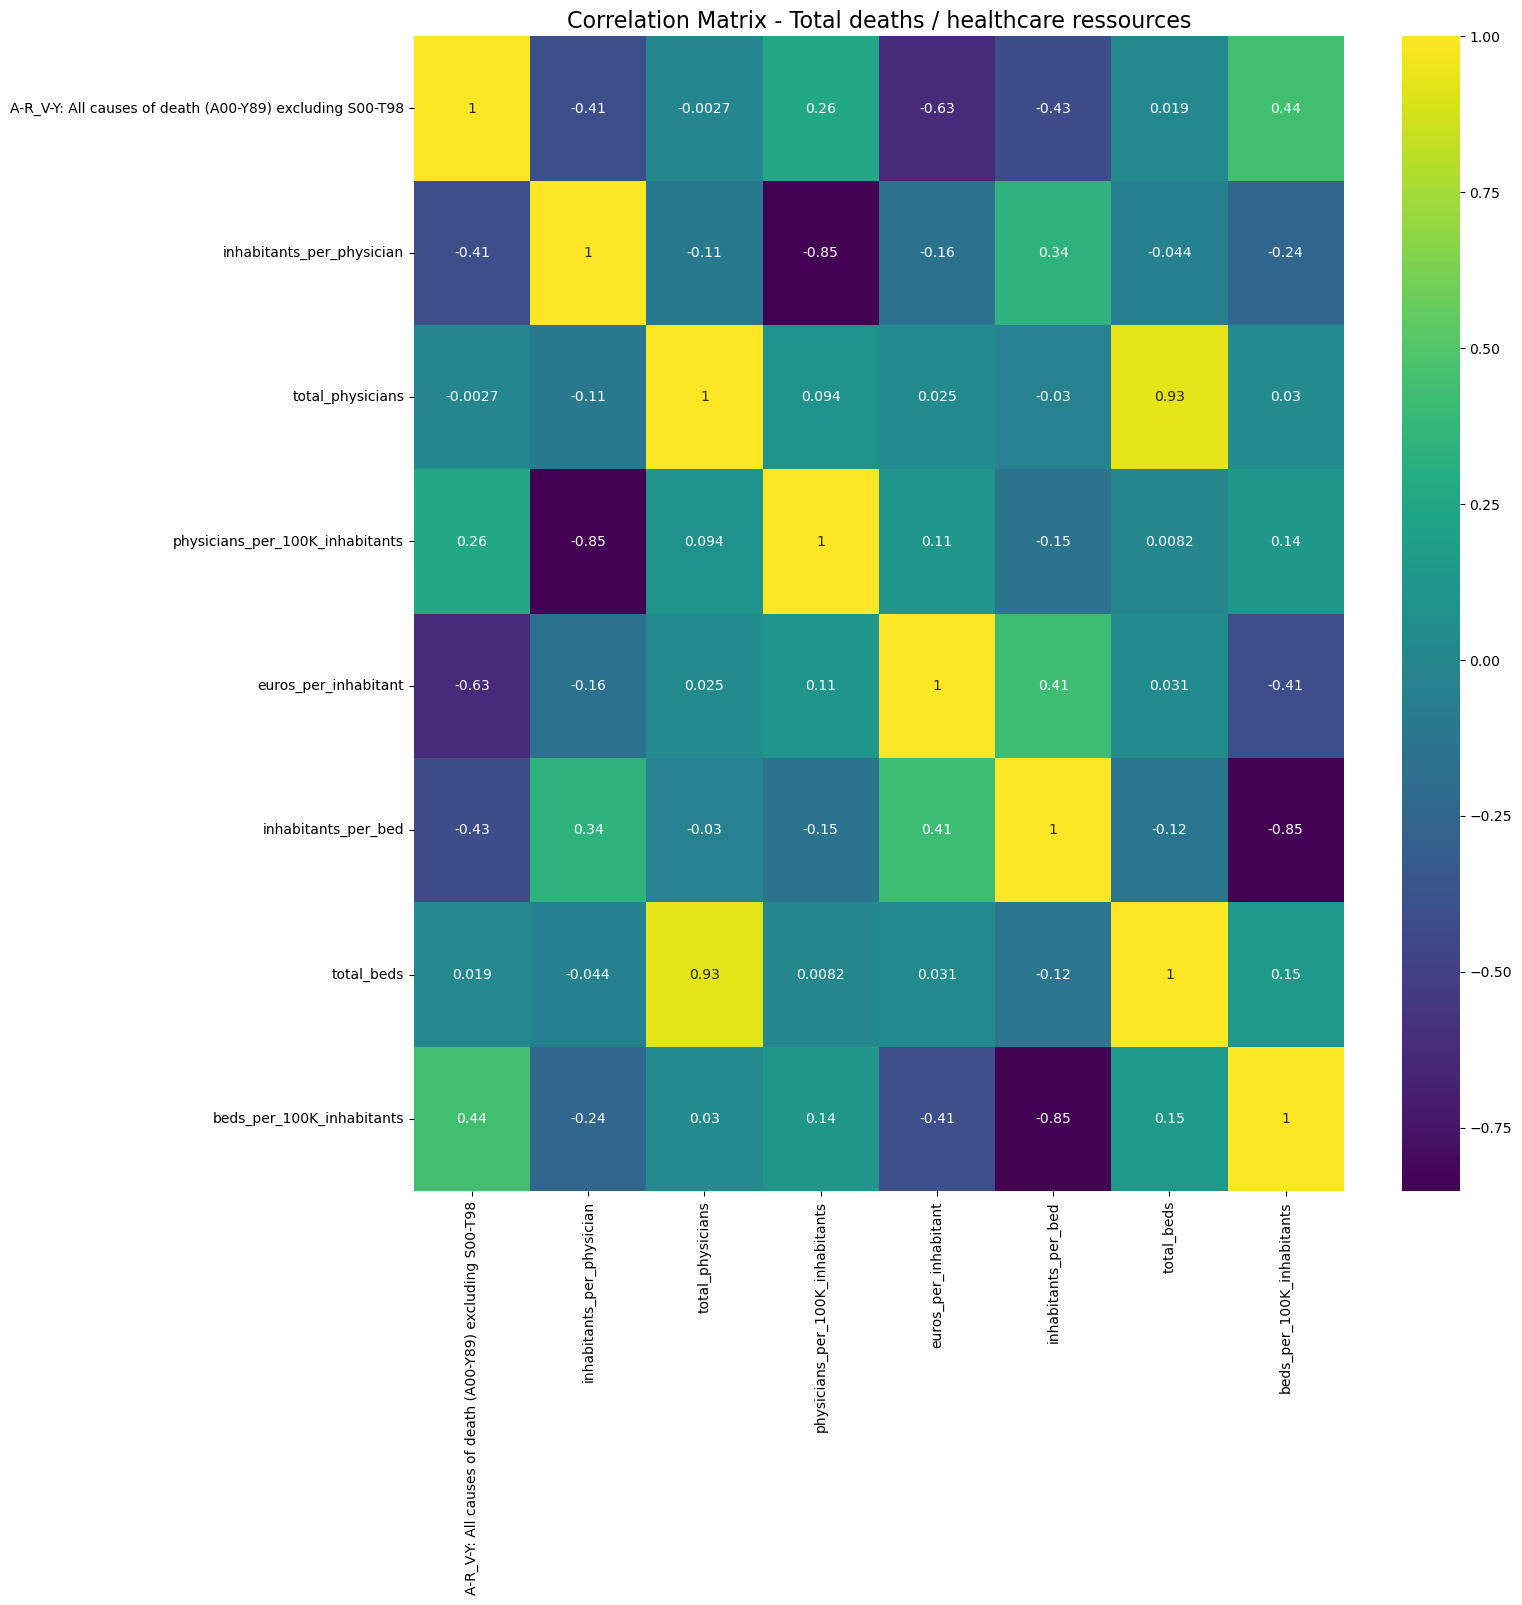

In [14]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(15,15))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax, cmap='viridis')
plt.title('Correlation Matrix - Total deaths / healthcare ressources', fontsize=16)

#saving the heatmap as a png
plt.savefig(os.path.join(path_viz,'correlation heatmap.png'), dpi=300, transparent=False, bbox_inches='tight', pad_inches=0.25)

The correlation heatmap is interesting by comparing all causes of deaths to the variables pointing the healtcare ressources:

**-with inhabitants per physicians**: moderate negative relation showing that the less inhabitants per physicians there are, the more deaths there are.

**-with physicians per 100K inhabitant**: weak positive relation telling that the more physicians there are, the more deaths there are : since both variable are expressed on the same unit of number per 100K inhabitants, this relation may mean that physicians tend to be in regions with more sick people (there is no way to validate this last opinion).

**-with euros per inhabitant**: there is a strong negative relation (the strongesst in the dataframe) indicaitng that the more money is spent per inhabitant, the less deaths there are.

**-with inhabitant per bed and beds per 100K inhabitants**: since both variables are opposite, there relation to the number of deaths is coherent, and showing a moderate relation that points out that the more hospital beds there are, the more deaths there are : people tend to die in hospitals, hence this relation, but with no way to validate this idea.

### Scatterplots
<div id='2.2'></div>

Exploring the relation between all deaths and three most related variables : inhabitants per physicians, euros per inhabitant and bed per 100K inhabitants

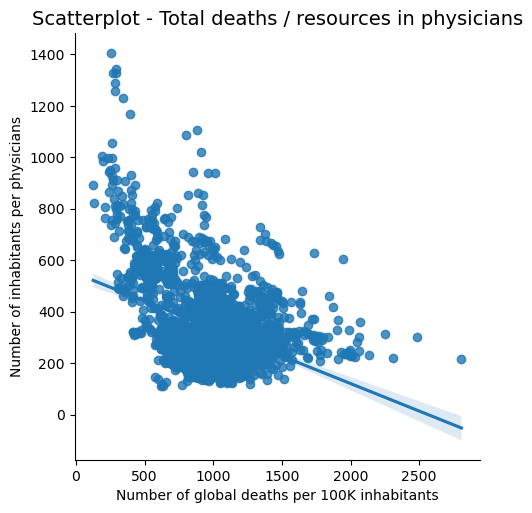

In [17]:
#Scatter plot with the inhabitants per physicians variable
sns.lmplot(x = 'A-R_V-Y: All causes of death (A00-Y89) excluding S00-T98', y = 'inhabitants_per_physician', data = df)
plt.title('Scatterplot - Total deaths / resources in physicians', fontsize=14)
plt.xlabel('Number of global deaths per 100K inhabitants', fontsize =10)
plt.ylabel('Number of inhabitants per physicians', fontsize =10)
plt.savefig(os.path.join(path_viz,'scatplot_deaths_to_physicians.png'), dpi=300, transparent=False, bbox_inches='tight', pad_inches=0.25)

**Inhabitants per physicians**: The negative relation is quite steep, with more outliers for regions with more physicians and less deaths per 100k inhabitants. There is a big central cluster where the relation is stronger (reduced variance), and widely spread relation as numbers go higher accounting for the negative trend. From this scatterplot we can understand that the more inhabitants per physicians there are, the less deaths there are, but it is mostly clustered on the center making for a poor assumption.

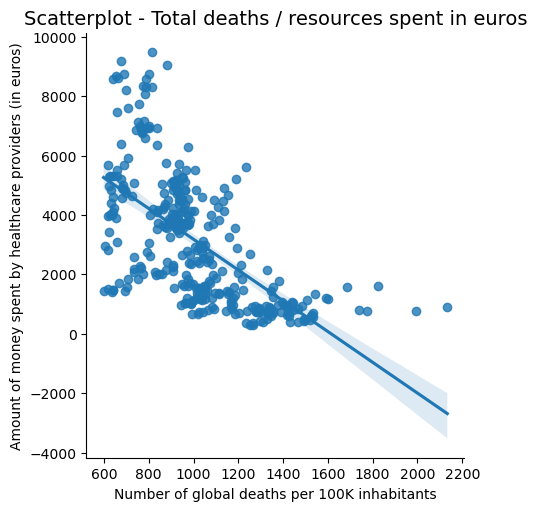

In [19]:
#Scatter plot with the euros per inhabitant (money spent by all healthcare providers divided by the population)
sns.lmplot(x = 'A-R_V-Y: All causes of death (A00-Y89) excluding S00-T98', y = 'euros_per_inhabitant', data = df)
plt.title('Scatterplot - Total deaths / resources spent in euros', fontsize=14)
plt.xlabel('Number of global deaths per 100K inhabitants', fontsize =10)
plt.ylabel('Amount of money spent by healthcare providers (in euros)', fontsize =10)
plt.savefig(os.path.join(path_viz,'scatplot_deaths_to_euros_providers.png'), dpi=300, transparent=False, bbox_inches='tight', pad_inches=0.25)

**Euros per inhabitant**: The trend is steep, with a clear relation showing that the more euros are spent by healthcate providers, the less deaths there are. It shows the strongest relation of the dataset, but still with some outliers, mostly on the higher spectrum of data points. We can see that some regions spend a lot with still more deaths than others, making them somewhat less efficient in there spending habits/organisations. It is clear that where the more deaths occure, the less ewpenditures are made.

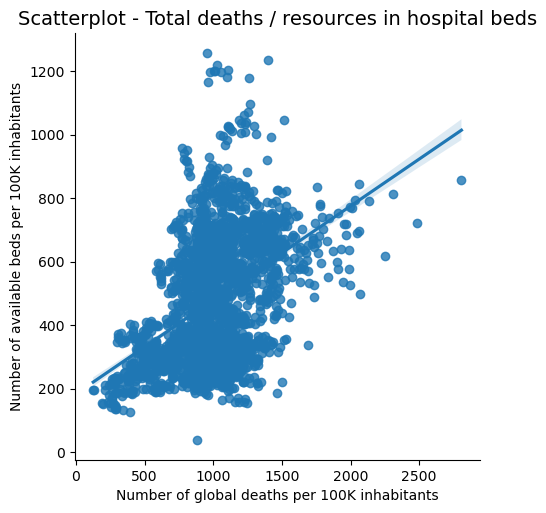

In [21]:
#Scatter plot with the number of beds per 100k inhabitants
sns.lmplot(x = 'A-R_V-Y: All causes of death (A00-Y89) excluding S00-T98', y = 'beds_per_100K_inhabitants', data = df)
plt.title('Scatterplot - Total deaths / resources in hospital beds', fontsize=14)
plt.xlabel('Number of global deaths per 100K inhabitants', fontsize =10)
plt.ylabel('Number of available beds per 100K inhabitants', fontsize =10)
plt.savefig(os.path.join(path_viz,'scatplot_deaths_to_beds.png'), dpi=300, transparent=False, bbox_inches='tight', pad_inches=0.25)

**beds per 100K inhabitantst**: the positive relation shows a steep trend telling that the more available hospital beds there are, the more deaths there are. At around 1000 deaths per 100K inhabitants, there seems to be another upward trend, as if it would be a breaking point where the munber of beds is less relevant (having more beds doesn't avoid or cause more beds on this threshold). There are some outliers that would interesting to differentiate by UE region.

### Pair plots 
<div id='2.3'></div>
The whole dataset being too wide, three pairplots will be made : 

- deaths in relation to healthcare resources

- deaths in relation to the unmet medical needs
  
- euros spent by healthcare providers per inhabitant to the unmet medical needs

*NOTE: A pair plot on all causes of deaths have been tried in this study, but the number of variables (95) made it impossible to create*

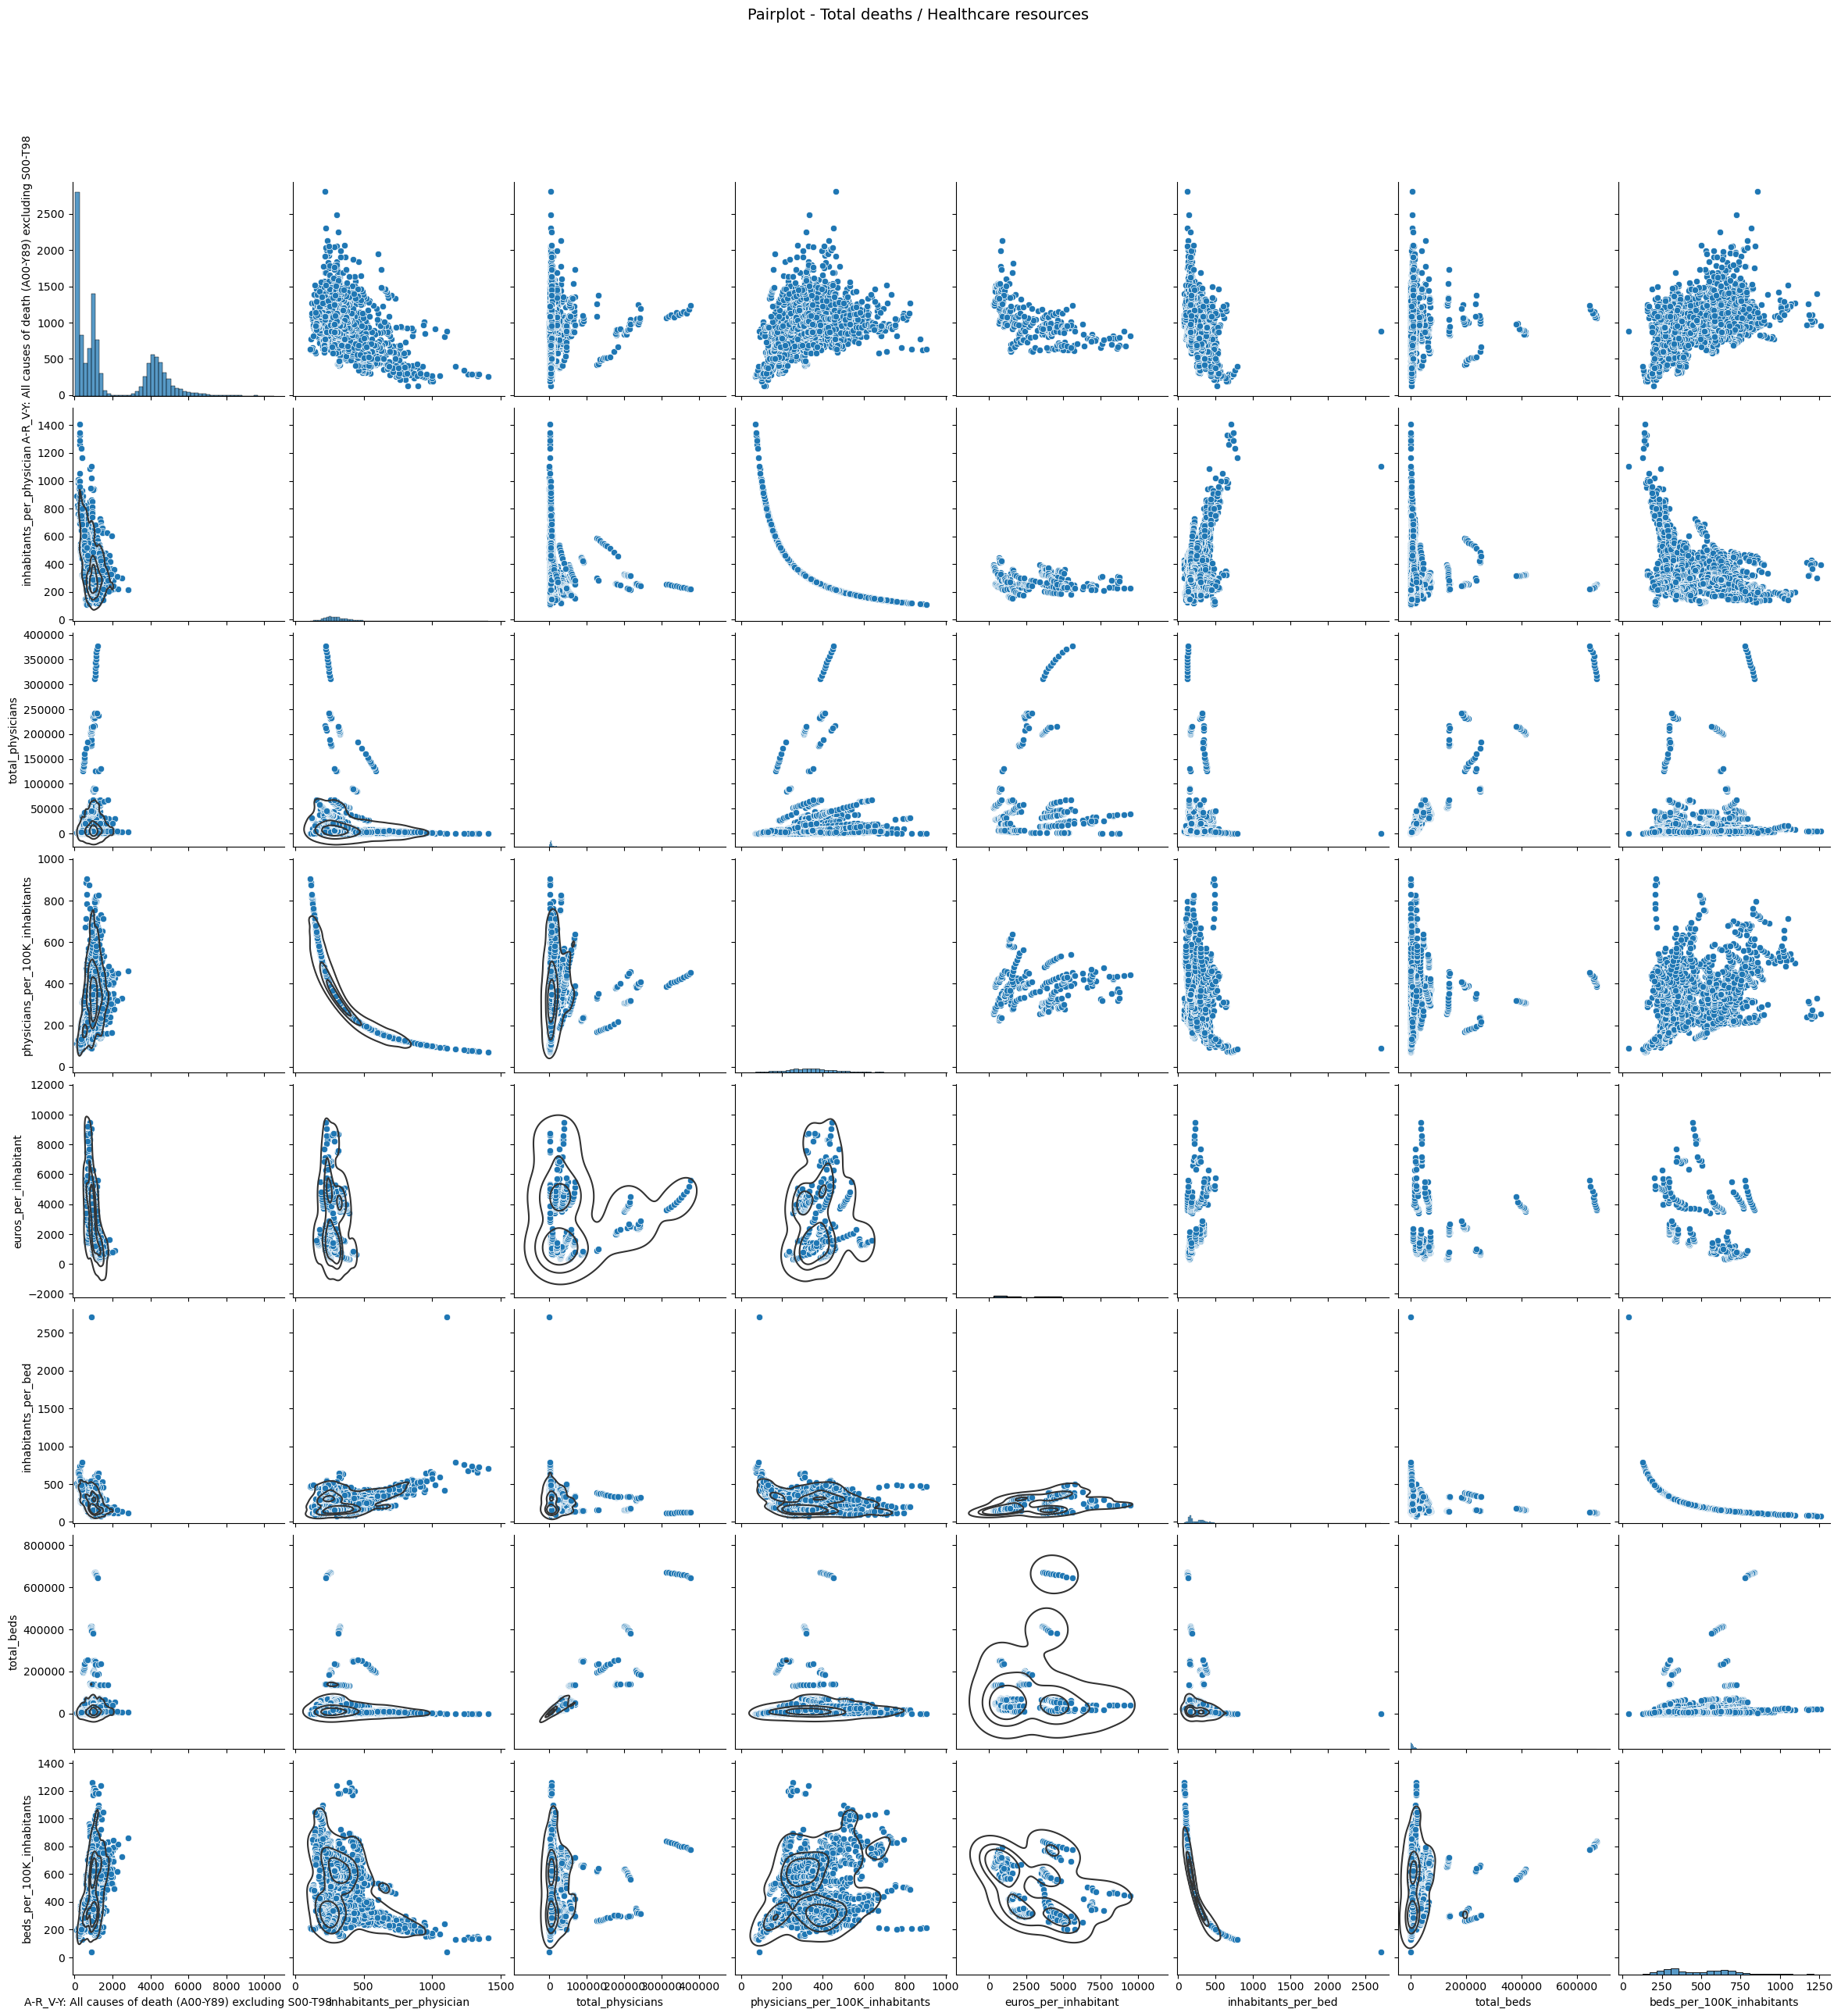

In [24]:
#creating a pair plot from the variables of the aggregate of deaths causes and each variable of healtcare resources


g = sns.pairplot(sub, dropna =True, height = 3)
g.fig.suptitle('Pairplot - Total deaths / Healthcare resources ', y=1.08, fontsize=14)
g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.savefig(os.path.join(path_viz,'pair_plot_deaths_resources.png'), dpi=300, transparent=False, bbox_inches='tight', pad_inches=0.25)

- Since some variables are linked to each other (more than one unit to account for beds and physicians), the relations showing clear lines banana shaped won't be of further interest.
  
- The most interesting relation is the one crossing the euros spent by healthcare providers to the other marks of healthcare resources : the number of beds is not a spending marker, whereas the number of physicians has a weak positive trend meaning that the more physicians there are, the more euros are spent by healthcare providers.

- The distribution of the aggregated death causes is divided in two blocks, with a surpizing normal like distribution as the number of deaths per 100K inhabitants is higher than 3k.

In [26]:
#creating the subset for the unmet medical needs
sub_umn =  pd.concat([df.loc[:,'A-R_V-Y: All causes of death (A00-Y89) excluding S00-T98'], df.loc[:, "Didn't know any good doctor or specialist": "Wanted to wait and see if problem got better on its own"]], axis=1)

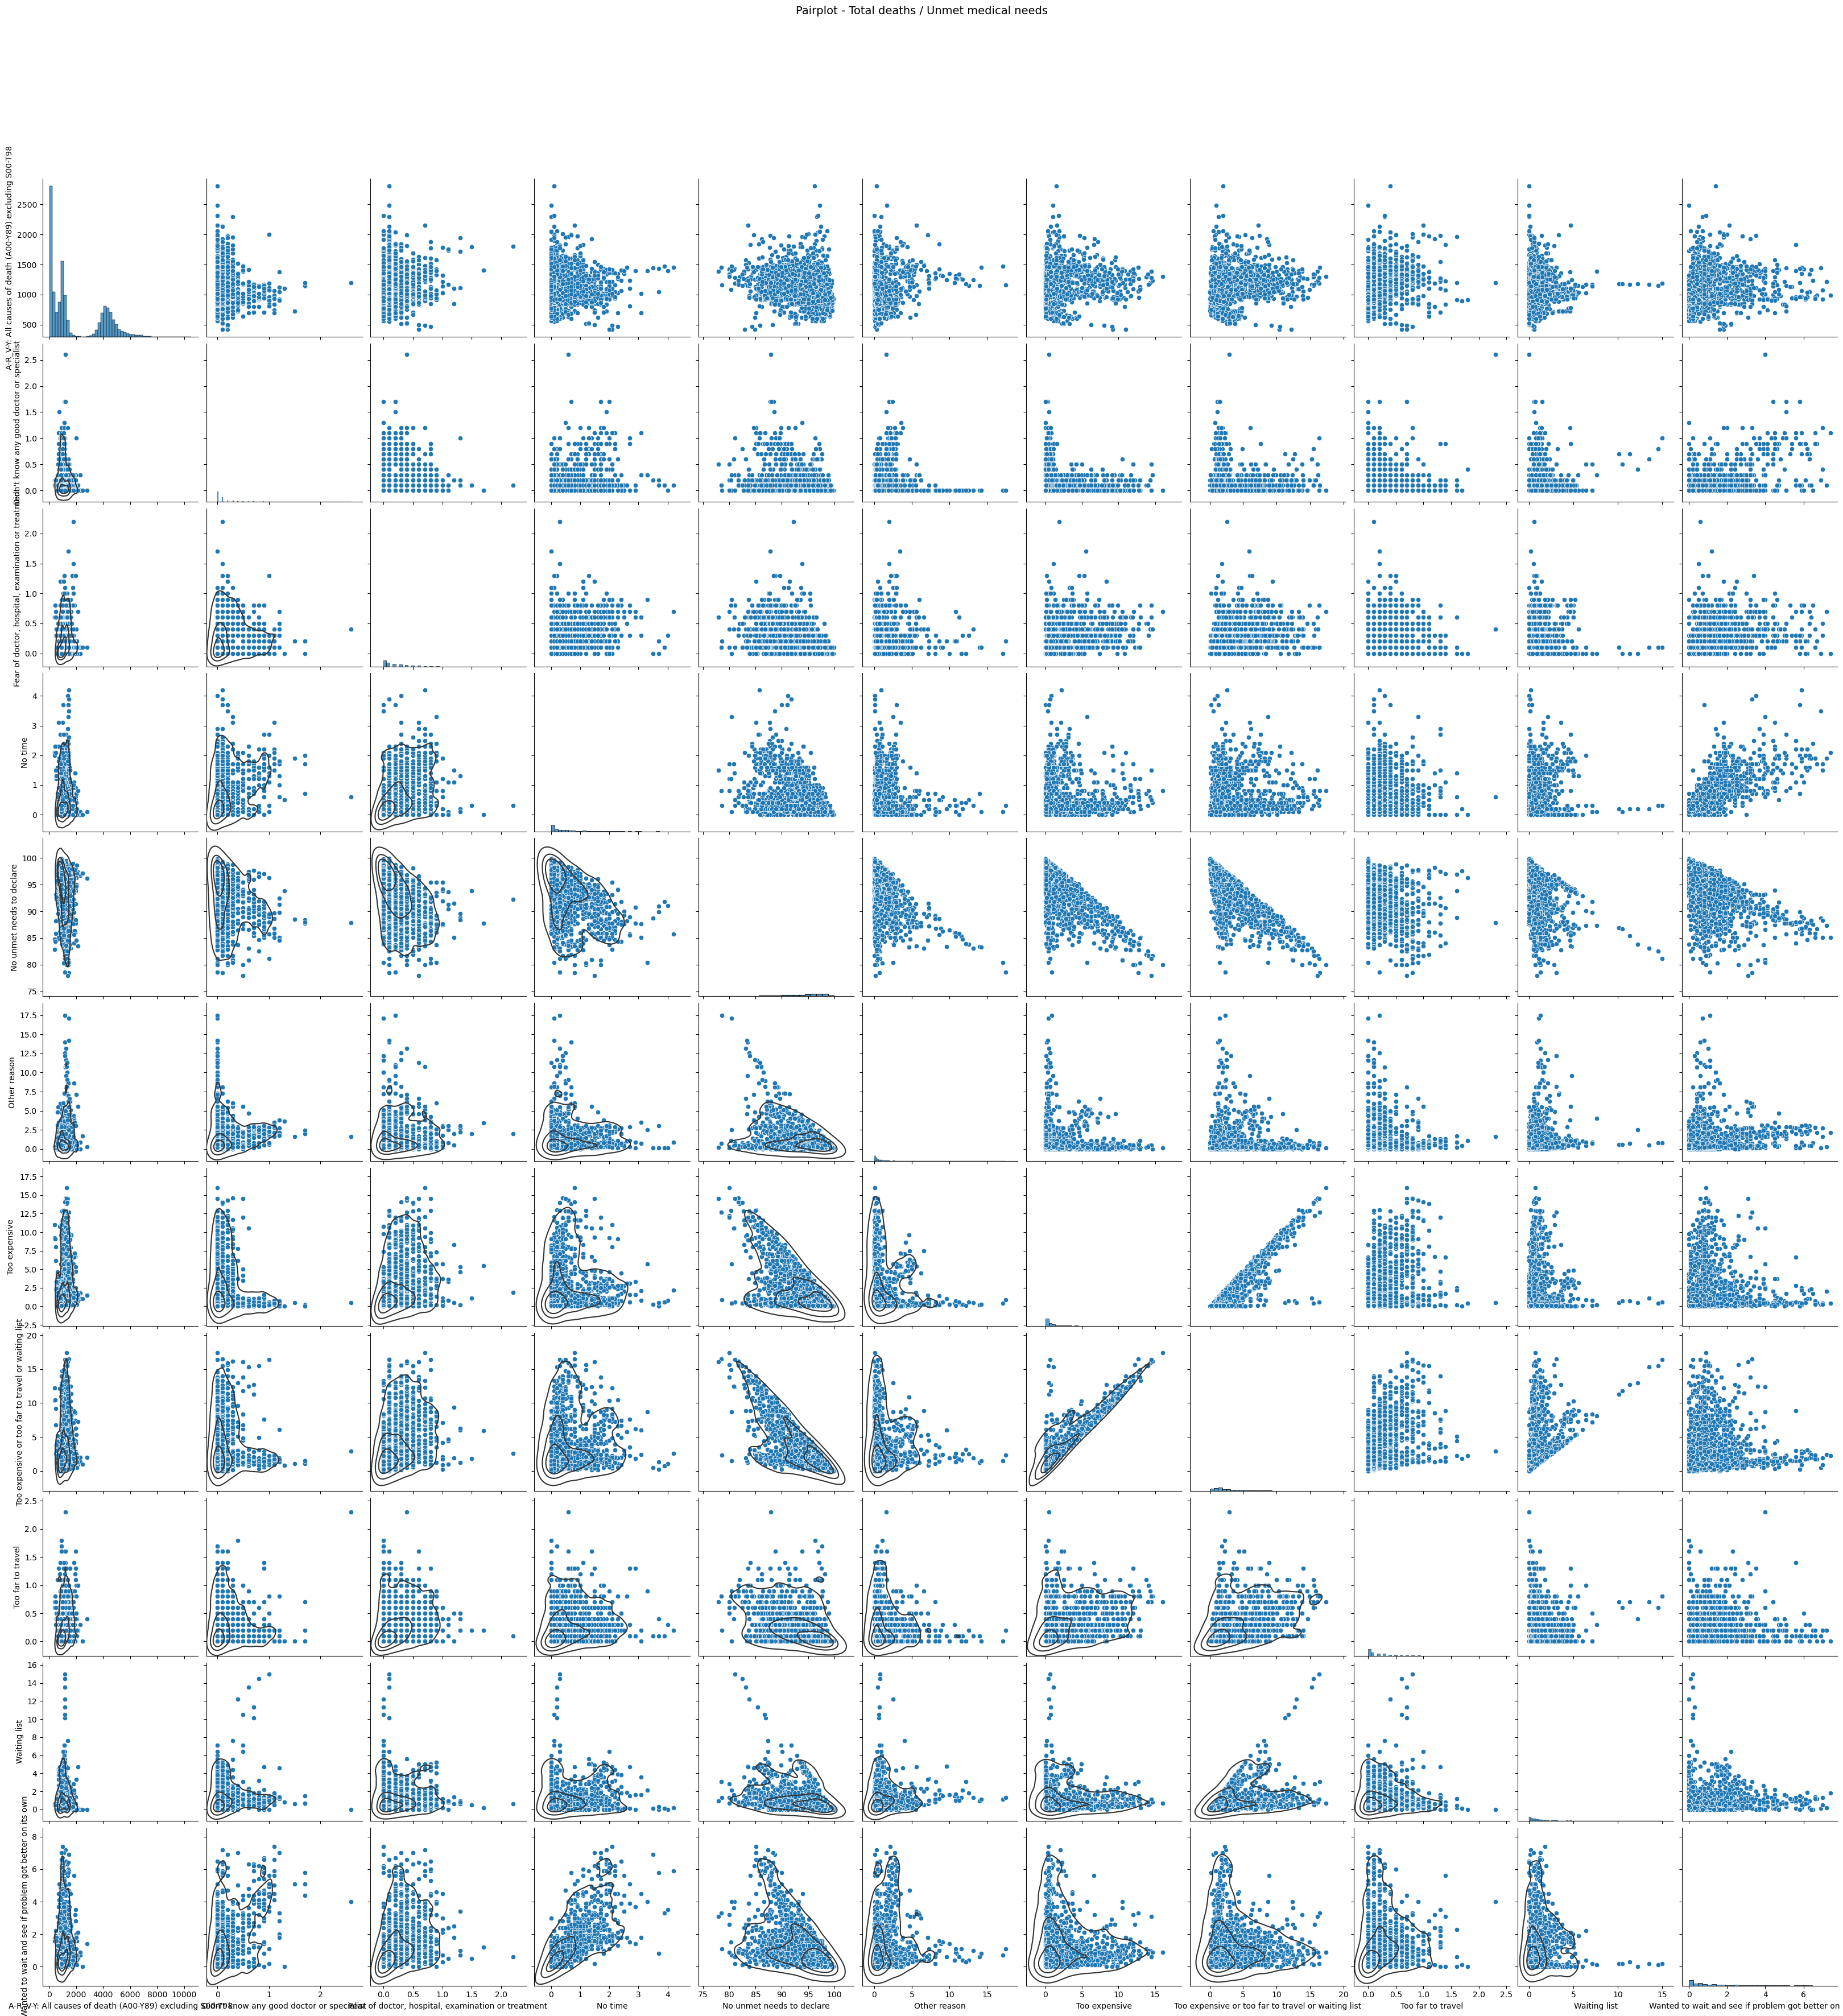

In [27]:
#creating a pair plot from the variables of the aggregate of deaths causes and each variable of unmet medical needs
g = sns.pairplot(sub_umn, dropna =True, height = 3)
g.fig.suptitle('Pairplot - Total deaths / Unmet medical needs', y=1.08, fontsize=14)
g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.savefig(os.path.join(path_viz,'pair_plot_deaths_unmet-needs.png'), dpi=300, transparent=False, bbox_inches='tight', pad_inches=0.25)

- From the first column of the pair plot crossing death numbers with all reasons for unmet medical needs, it is clear that UE countries with people with unmet medical needs dont have more or less deaths per 100K inhabitants: these variable have no impact on deaths in EU according to this survey, it might mean that the described 'needs' are not vital needs, and that true needs are mostly met in Europe.

- The only negative relations are by crossing the 'no unmet needs to declare' to all the other reasons : the more needs are met, the less neesd are unmet, nothing new to learn form this.

- The strong positive relations are from linked reasons of too expansive, too far or waiting list and there aggregation as a single variable.

- These variable are maybe disposable from this study since they do not bring much insights by death comparing. A further analysis crossing them to all healthcare resources might hopefullly be more meaningful, if not they will be droped or kept for only geographical comparisons.

In [29]:
#creating the subset for all causes of deaths
sub_eur_umn =  pd.concat([df.loc[:,'euros_per_inhabitant'], df.loc[:, "Didn't know any good doctor or specialist": "Wanted to wait and see if problem got better on its own"]], axis=1)

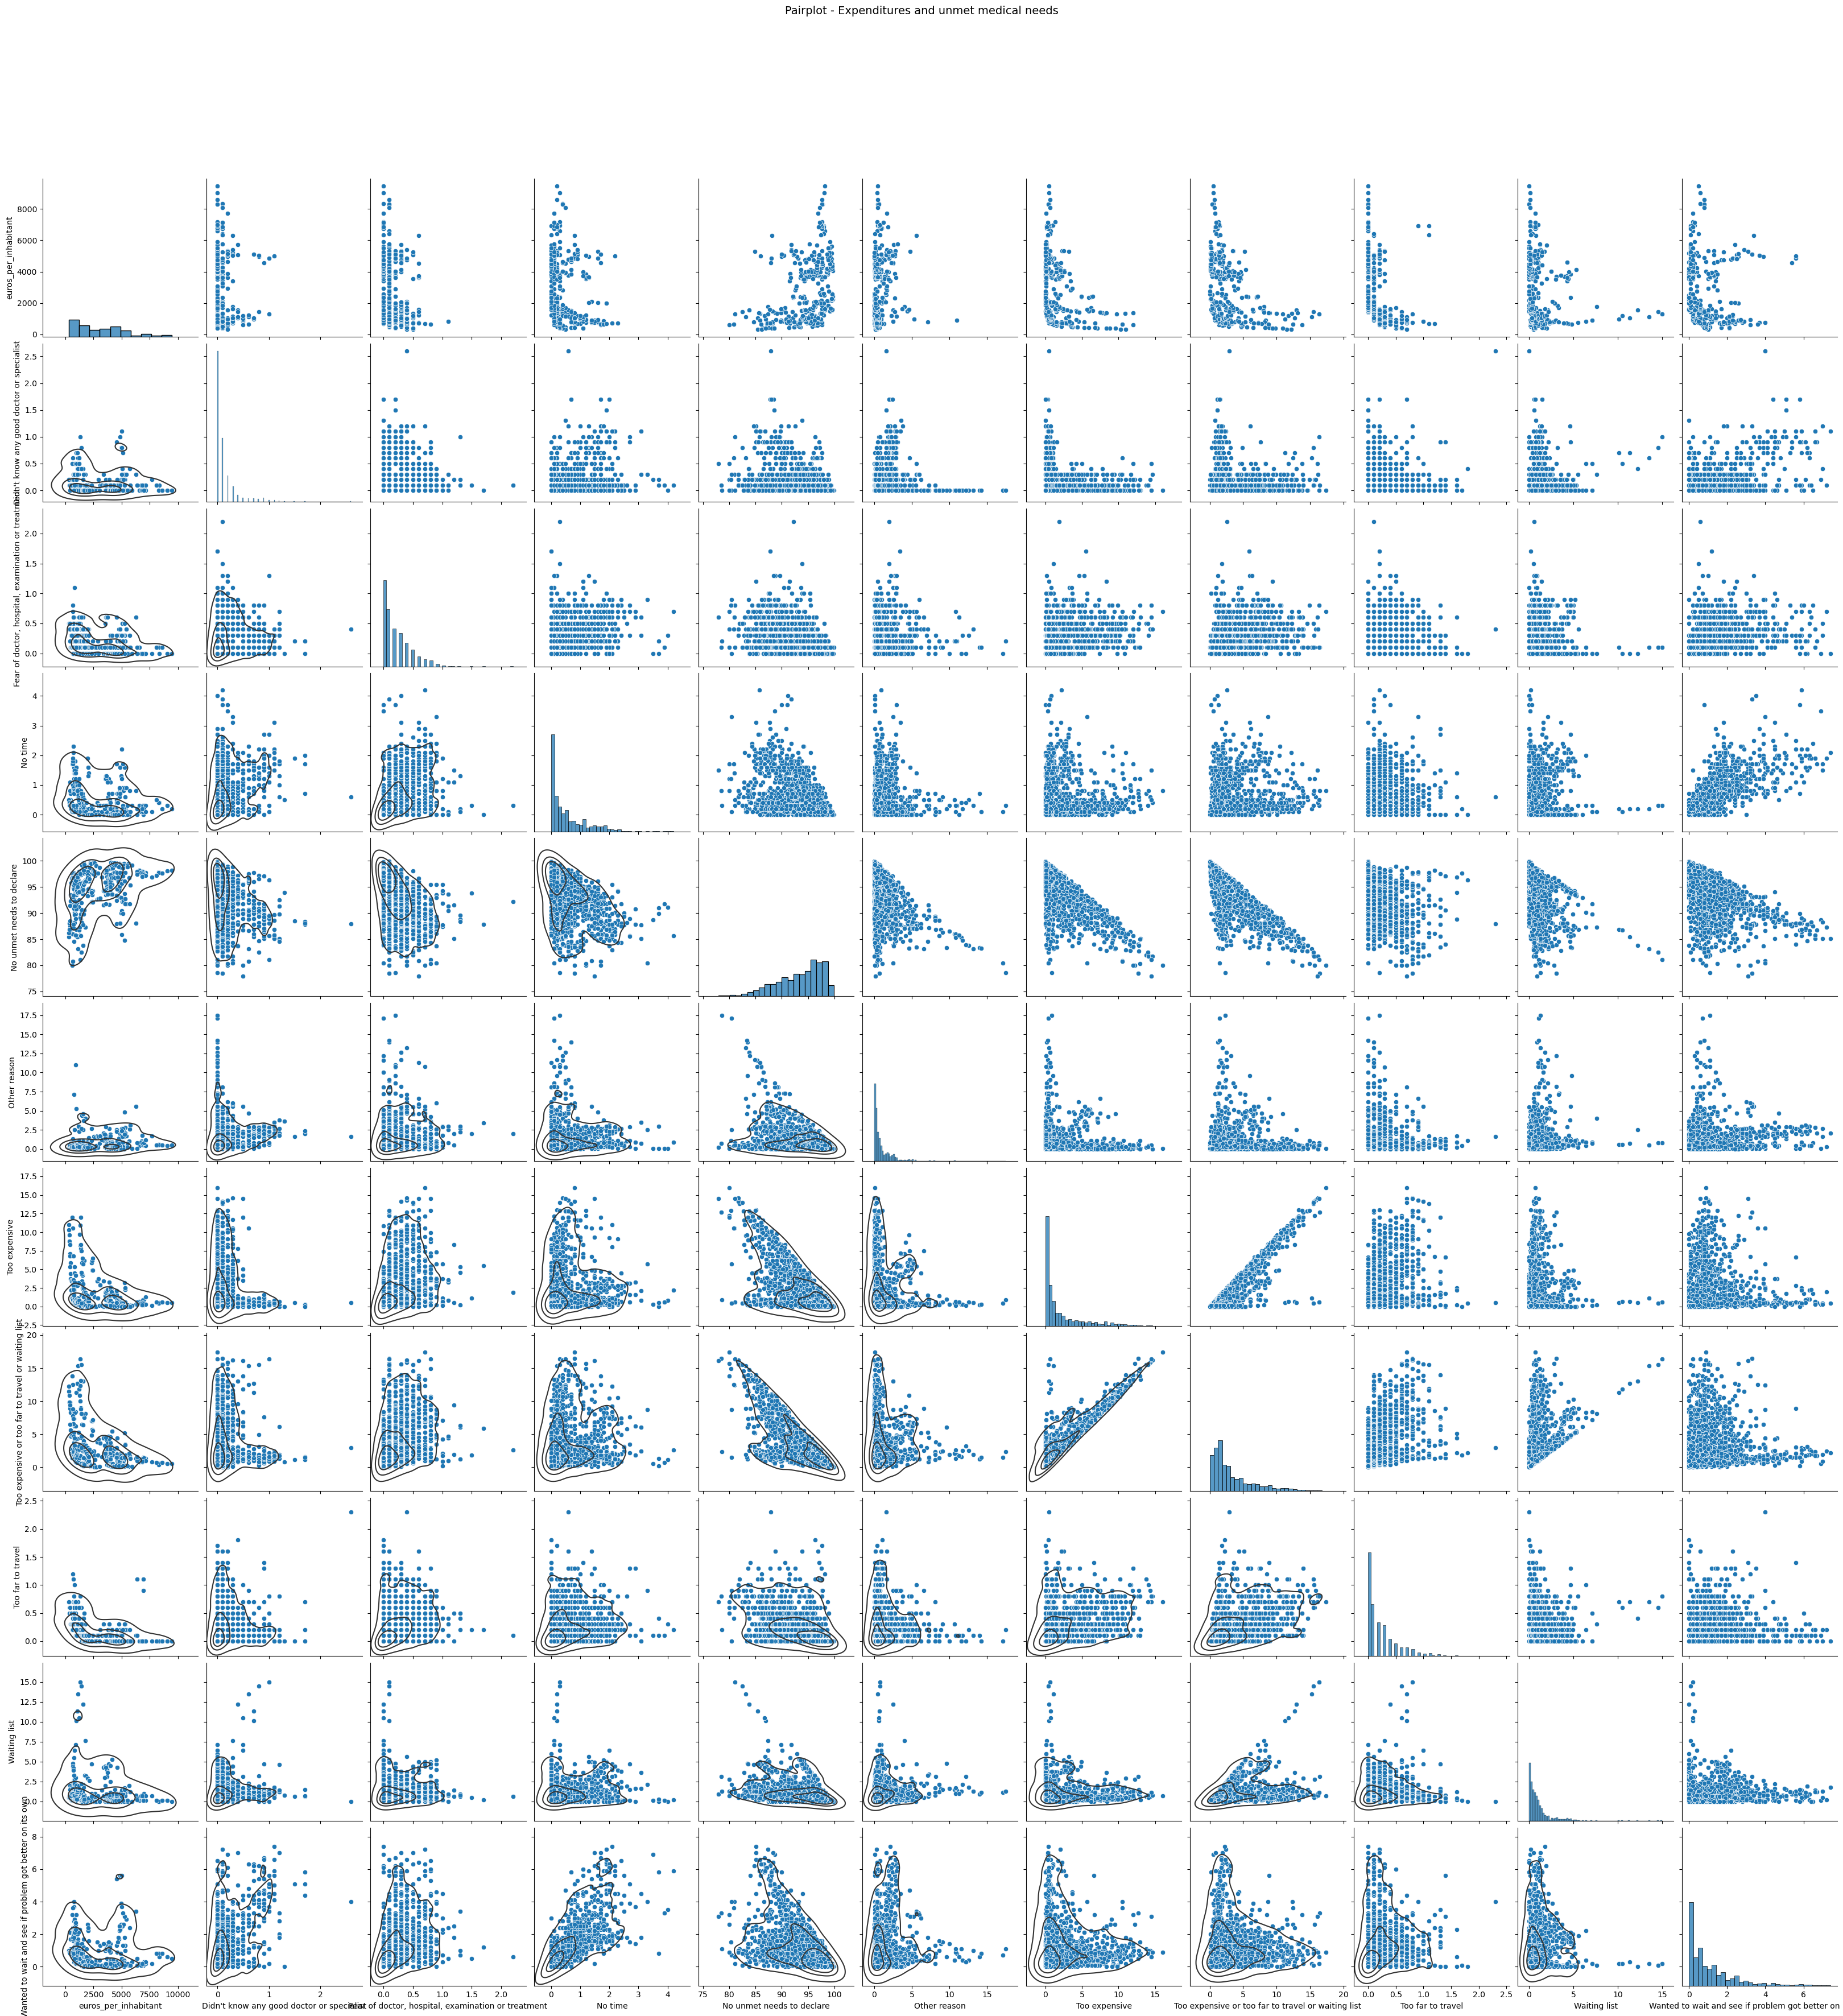

In [30]:
#creating a pair plot from the variables of all the unmet medical needs
g = sns.pairplot(sub_eur_umn, dropna =True, height = 3)
g.fig.suptitle('Pairplot - Expenditures and unmet medical needs', y=1.08, fontsize=14)
g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.savefig(os.path.join(path_viz,'pair_plot_eur_umn.png'), dpi=300, transparent=False, bbox_inches='tight', pad_inches=0.25)

The pair plot of unmet medical needs to the amount spent per inhabitant by healtcare providers is significant for the populations with no unmet needs (The more euros are spent, the more people have no unmet needs), and for the aggregate of 'too expensive, too far or waiting list', looking very similar to the too expensive reason, making us believe that the more expensive medical care are to people, the less euros are spent by health providers. It means that the less providers spend money, the more potential patients have to pay on their own : it could be a good way to evaluate and compare healthcare systems across EU.

### Categorical plots
<div id='2.4'></div>

The variable 'euros_per_inhabitant' could be categorized in order to classify countries, let's create a  histplot from this variable

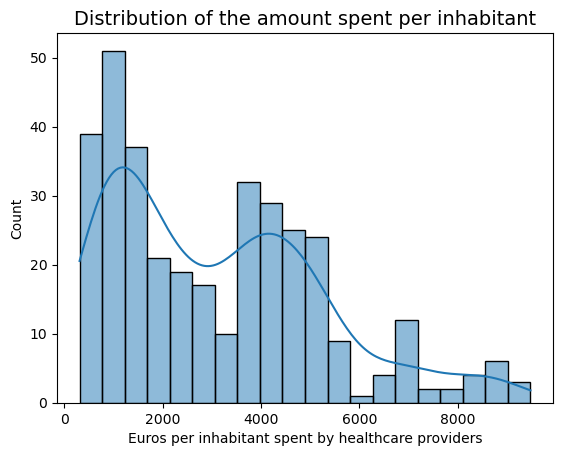

In [33]:
#creating the histplot from the amount of euros spent by healtcare porviders
sns.histplot(sub['euros_per_inhabitant'], bins = 20, kde = True)
plt.title('Distribution of the amount spent per inhabitant', fontsize=14)
plt.xlabel('Euros per inhabitant spent by healthcare providers', fontsize =10)
plt.ylabel('Count', fontsize =10)
plt.savefig(os.path.join(path_viz,'histplot_euros.png'), dpi=300, transparent=False, bbox_inches='tight', pad_inches=0.25)

In [34]:
#creating subcategories for the amounts spent by providers in countries

# For lower spending providers
df.loc[df['euros_per_inhabitant'] < 2000, 'Providers category'] = 'Low providers'

In [35]:
# For medium spending providers
df.loc[(df['euros_per_inhabitant'] >= 2000) & (df['euros_per_inhabitant'] < 6000), 'Providers category'] = 'Medium providers'

In [36]:
# For high spending providers
df.loc[df['euros_per_inhabitant'] >= 6000, 'Providers category'] = 'High providers'

In [37]:
#Counting all tags
df['Providers category'].value_counts(dropna = True) #many Nan are expected since euros_per_inhabitant variable as a grain of the countries and not the regions

Providers category
Medium providers    173
Low providers       141
High providers       33
Name: count, dtype: int64

In [38]:
#subsetting the dataframe with only the countries (striped from the regions)

df_country = df[df['geo_code'].str.len() == 2]

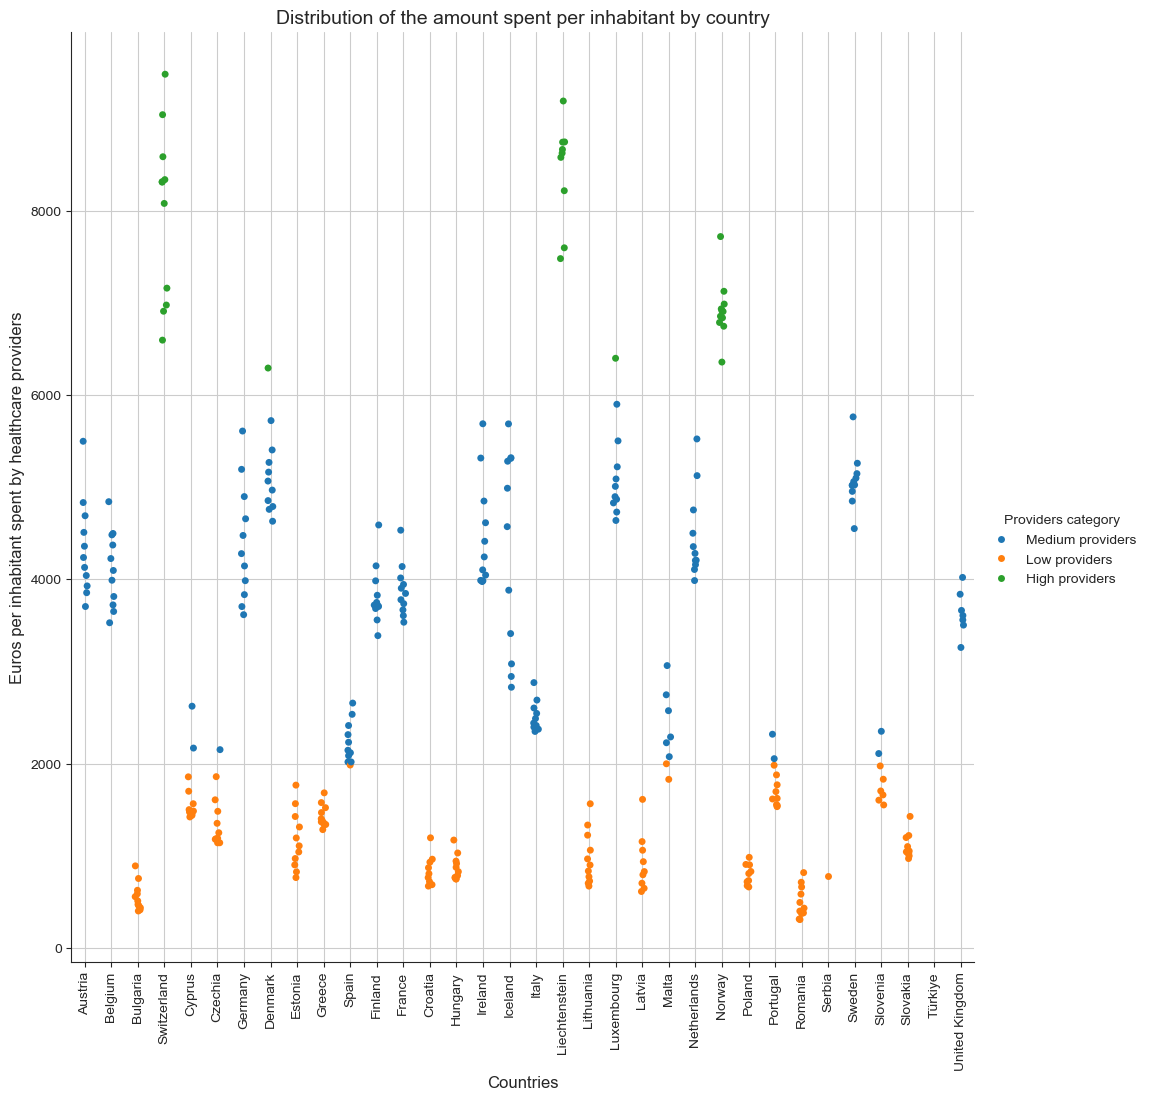

In [39]:
# Create a categorical plot using the expenditures categories in relation to the countries

sns.set_style("ticks")
sns.color_palette('colorblind')
g = sns.catplot(x='country_region', y='euros_per_inhabitant', hue='Providers category', data=df_country, legend_out =True, ax =ax, height = 10)
plt.title('Distribution of the amount spent per inhabitant by country', fontsize=14)
plt.xlabel('Countries', fontsize =12)
plt.xticks(rotation=90)
plt.ylabel('Euros per inhabitant spent by healthcare providers', fontsize =12)
plt.grid()
plt.savefig(os.path.join(path_viz,'catplot_euros_geo.png'), dpi=300, transparent=False, bbox_inches='tight', pad_inches=0.25)

- There are great disparities from a country to another with Switserland and Liechtenstein having the most spending providers, and Bulgaria, Romania and Poland the least.

- Each dot represents the data for a single year, meaning some countries have changed differently over the past years, and is looks like the more providers spend, the more they evolved over the years (the poorest providers are the ones not changing as fast).
  
- Some countries have changed categories, a detailed graph by year would help to see the sens of the evolutions.

## 3. Questions / answers
<div id='3'></div>

#### Previously asked questions
- Do the countries with the more healthcare resources per inhabitant endure less deaths for some particular deaths causes?
- Which healthcare resource is the most important facing deaths for people younger than 65y/o?
- Are all regions equal in term of death causes?
- Are physicians equally spread across the regions and does it impact the number of deaths?
- Where are people with the most unmet medical needs and does it affect their death rate?
- Do people die from the same causes across Europe?
- How the number of available hospital beds evolved from 2011 to 2021 in Europe?
- Are expenditures correlated to the number of physicians, beds and unmet medical needs?
- Which countries in Europe are the most/least efficient in providing health care from its resources?


#### Possible answers at this stage

***All questions related to the location are not answered so far in the study.***

- **Which healthcare resource is the most important facing deaths for people younger than 65y/o?** No filter on the younger part of the population, but so far we can say that the most globally important healtcare resource is the amount spent by heathcare providers as its relation to the number of total of death causes is the strongest.

- **Where are people with the most unmet medical needs and does it affect their death rate?** So far we know that declared unmet medical needs has none to very little effect on death rates.

- **Are expenditures correlated to the number of physicians, beds and unmet medical needs?** Expenditures tend to be more dependent on the number of physicians than on the number of available hospital beds by region. The relation not being that strong, there must be many other parameters to the expenditures outside of the scope of the data sets at hand. Also there is a clear relation to the amounts paid by healcare providers and the fact that people find care too expensive (if providers pay less) or if people have no unmet medical needs (if providers spend more).


#### Arising questions
- Why are the deaths counts following a double distribution : one right skewed (excpected for), and another bounce, almost normally distributed, at around 3K deaths per 100K inhabitants?
- Since the euros spend per inhabitant by healtcare providers is a good indicator for people having less unmet medical needs, are there countries in Europe in need of amelioration?
- Are expenditures from heathcare providers evolving in each country in a positive way over the years ?

## 4. Hypothesis defining from the relation study
<div id='4'></div>

- If healthcare providers spend more money per inhabitant, then death rates are reduced.
    - similiarly: *If a country has more expenditures, then it has less deaths*
- If healthcare providers spend more money per inhabitant, then people have no unmet medical needs.
- If a death cause is responsible for 3K deaths per 100K inhabitants in some regions, then it will cause more deaths in other regions *(gotten from the distribution of death causes)*.